<a href="https://colab.research.google.com/github/DhilipSanjay/Detection-of-Sensitive-Data-Exposure-in-Images/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

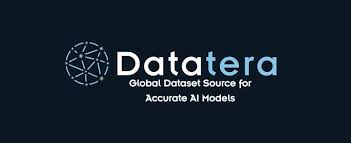



# New Section

# **SENSITIVE DATA INDICATOR**

# This notebook aims to capture Sensitive Data (Name, email address, password, phone number, date of birth etc) for a given Text Data.

## Importing libraries and downloading the dataset

In [1]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import google.protobuf

In [3]:
# Importing the necessary libraries
import pandas as pd
import tensorflow as tf


In [4]:
import json
import os
import random

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
sensitive_datafile = "SensitiveDataset.json"
nonsensitive_datafile = "NonSensitiveDataset.json"

In [7]:
sensitive_datafile

'SensitiveDataset.json'

In [8]:
# Necessary Variables
vocab_size = 3000
embedding_dim = 32
max_length = 60
truncation_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Preprocessing the dataset

In [9]:
dataList = []
sentences = []
labels = []
# Stopwords should be removed or excluded from the given text so that more 
# focus can be given to those words which define the meaning of the text.
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
             "any", "are", "as", "at", "be", "because", "been", "before", "being", "below",
             "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down",
             "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself",
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it",
             "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on",
             "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
             "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that",
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
             "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
             "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what",
             "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom",
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

def loadDataset(filename):
  with open(filename, 'r') as f:
      datastore = json.load(f)
  for item in datastore:
    sentence = item['data']
    label = item['is_sensitive']
    for word in stopwords: #Remove stop words in sentence
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    dataList.append([sentence, label])

# Loading both sensitive and non-sensitive dataset
loadDataset(sensitive_datafile)
loadDataset(nonsensitive_datafile)

# Shuffling the dataset randomly
random.shuffle(dataList)

# Dataset size: 31500 (approx)
print("Dataset Size: ", len(dataList))

# Dataset has both sentences and labels
for item in dataList:
  sentences.append(item[0])
  labels.append(item[1])

# Splitting up the total dataset
# Training size = 20000
# Validation size = 11500 (approx)
training_sentences = sentences[0:training_size]
validation_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
validation_labels = labels[training_size:]

print("Training Dataset Size: ", len(training_sentences))
print("Sample Training Data:", training_sentences[1])
print("Validation Dataset Size: ", len(validation_sentences))
print("Sample Validation Data:", validation_sentences[1])

Dataset Size:  31576
Training Dataset Size:  20000
Sample Training Data: username:elmar, password:darryl, email:elmar@home.nl, phone no:6664268772
Validation Dataset Size:  11576
Sample Validation Data: username:donald, password:yandel, email:donald@laposte.net, phone no:5761380635


In [10]:
sen=pd.read_json(sensitive_datafile)
sen.head()

,is_sensitive,data
0,1,"username:aaliyah, password:123456, email:aaliy..."
1,1,"username:aaren, password:12345, email:aaren@ya..."
2,1,"username:aarika, password:123456789, email:aar..."
3,1,"username:aaron, password:iloveyou, email:aaron..."
4,1,"username:aartjan, password:princess, email:aar..."


In [11]:
nonsen=pd.read_json(nonsensitive_datafile)
nonsen.head()

,is_sensitive,data
0,0,"A bartender is working at a saloon, serving dr..."
1,0,"The moon, painted with a smiling face hangs ov..."
2,0,"The film, just over a minute long, is composed..."
3,0,Lasting just 61 seconds and consisting of two ...
4,0,The earliest known adaptation of the classic f...


In [12]:
# Tokenizer takes the num_words (here vocab_size = 3000) maximum occuring unique words from the dataset.
# Anything out of these words will be treated as Out of Vocabulary(<oov>)
# It strips the punctutations and removes upper-case letters.
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Apply the tokenizer on training sentences and generate the word index
# Eg: word_index["the"] = 1; word_index["cat"] = 2; etc.
tokenizer.fit_on_texts(training_sentences)

# Save the word index (Used for deploying in web application)
word_index = tokenizer.word_index
print("Size of word index:", len(word_index))

with open("word_index.json", "w") as outfile:  
    json.dump(word_index, outfile)
    print("Saving the word index as JSON")

# Transforms each word in sentences to a sequence of integers based on the word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# To feed the text into neural network - sentences must be of the same length. Hence we'll be using padding.
# If the sentences are smaller than the maxlen, then we'll pad (Here, we are using post padding)
# If the sentences are larger than the maxlen, then we'll truncate (Here, we are using post truncation)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)

# Apply the same for validation data
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)

Size of word index: 103097
Saving the word index as JSON


In [13]:
# Convert to Numpy arrays, so as to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
validation_padded = np.array(validation_padded)
validation_labels = np.array(validation_labels)

## Model

In [14]:
# Callbacks to cancel training after reaching a desired accuracy
# This is done to avoid overfitting
DESIRED_ACCURACY = 0.999
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print("Reached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Sequential - defines a SEQUENCE of layers in the neural network.
model = tf.keras.Sequential([
    # Embedding - Turns positive integers (indexes) into dense vectors of fixed size (here embedding_dim = 32).
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # 1D convolution layer - filter size = 128, convolution window = 5, activation fn = ReLU
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # Global average pooling operation (Flattening)
    tf.keras.layers.GlobalAveragePooling1D(),
    # Regular densely-connected Neural Network layer with ReLU activation function.
    tf.keras.layers.Dense(24, activation='relu'),
    # Regular densely-connected Neural Network layer with sigmoid activation function.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.compile - Configures the model for training.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Adam -  optimization algorithm used instead of the classical stochastic gradient descent procedure to update network weights.

# Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 32)            96000     
                                                                 
 conv1d (Conv1D)             (None, 56, 64)            10304     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 107,889
Trainable params: 107,889
Non-trainable params: 0
__________________________________________________

## Training

In [15]:
num_epochs = 6

# model.fit - Train the model for a fixed number of epochs
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(
                        validation_padded, 
                        validation_labels), 
                    verbose=1)
                    #callbacks=[callbacks])

Epoch 1/6
625/625 [==============================] - 8s 10ms/step - loss: 0.0513 - accuracy: 0.9892 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 2/6
625/625 [==============================] - 6s 10ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 7.8687e-04 - val_accuracy: 0.9999
Epoch 3/6
625/625 [==============================] - 7s 11ms/step - loss: 3.6810e-04 - accuracy: 0.9999 - val_loss: 3.3862e-04 - val_accuracy: 0.9999
Epoch 4/6
625/625 [==============================] - 6s 10ms/step - loss: 1.5917e-04 - accuracy: 0.9999 - val_loss: 1.9365e-04 - val_accuracy: 0.9999
Epoch 5/6
625/625 [==============================] - 7s 11ms/step - loss: 8.2039e-05 - accuracy: 0.9999 - val_loss: 8.5576e-05 - val_accuracy: 1.0000
Epoch 6/6
625/625 [==============================] - 7s 10ms/step - loss: 3.9621e-05 - accuracy: 1.0000 - val_loss: 4.9519e-05 - val_accuracy: 1.0000


## Plotting Accuracy and Loss Functions

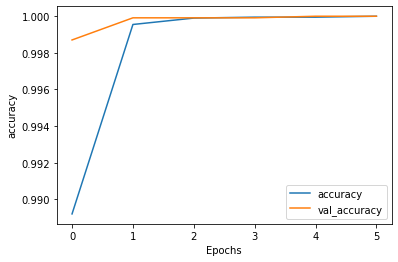

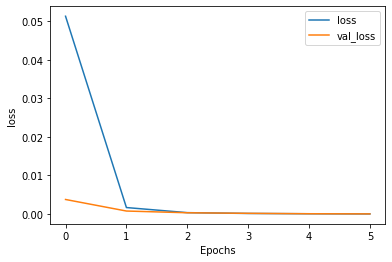

In [16]:
import matplotlib.pyplot as plt

# Plot the accuracy and loss functions
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Confusion Matrix

Confusion Matrix
Accuracy for 2894 Test Data =  100.0
Accuracy for 5788 Test Data =  100.0
Accuracy for 8682 Test Data =  100.0
Accuracy for 11576 Test Data =  100.0


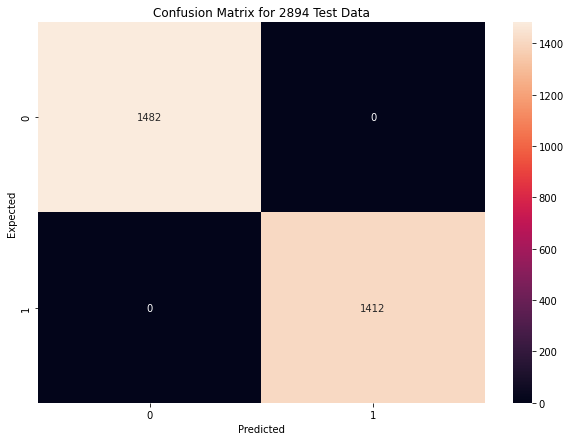

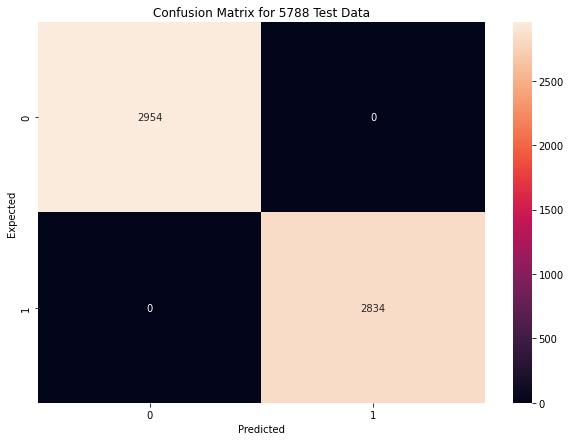

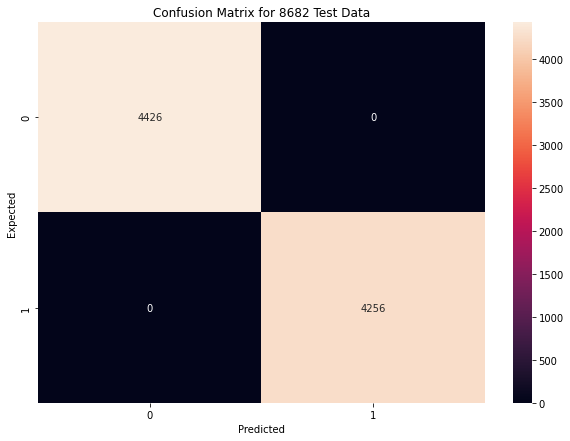

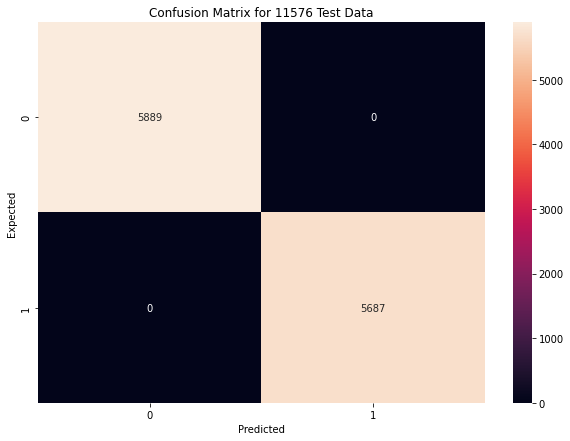

In [17]:
import seaborn
print('Confusion Matrix')
y_predicted = model.predict(validation_padded)
y_predicted_labels = y_predicted > 0.5

size = np.size(y_predicted_labels)
y_predicted_labels = y_predicted_labels.reshape(size, )

for i in range (1, 5):
  total = i * size // 4
  cm = tf.math.confusion_matrix(labels=validation_labels[0:total],predictions=y_predicted_labels[0:total])

  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = (cm_np[0, 0] + cm_np[1, 1])/ np.sum(cm_np) * 100
  print("Accuracy for", str(total), "Test Data = ", conf_acc)

  # Plot the confusion matrix
  plt.figure(figsize = (10,7))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for " + str(total) + " Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')

## Saving the model

In [18]:
# Save and convert the model (Used for deploying in web application)
model.save('model/text_model.h5')
print("Saved the model successfully")

!apt-get -qq install virtualenv
!virtualenv -p python3 venv
!source venv/bin/activate
!pip install -q tensorflowjs
!tensorflowjs_converter --input_format=keras /content/model/text_model.h5 /content/text_model
print("Model converted to JSON successfully")

Saved the model successfully
Selecting previously unselected package python-pip-whl.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../python-pip-whl_9.0.1-2.3~ubuntu1.18.04.5_all.deb ...
Unpacking python-pip-whl (9.0.1-2.3~ubuntu1.18.04.5) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../python3-pkg-resources_39.0.1-2_all.deb ...
Unpacking python3-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python3-virtualenv.
Preparing to unpack .../python3-virtualenv_15.1.0+ds-1.1_all.deb ...
Unpacking python3-virtualenv (15.1.0+ds-1.1) ...
Selecting previously unselected package virtualenv.
Preparing to unpack .../virtualenv_15.1.0+ds-1.1_all.deb ...
Unpacking virtualenv (15.1.0+ds-1.1) ...
Setting up python-pip-whl (9.0.1-2.3~ubuntu1.18.04.5) ...
Setting up python3-pkg-resources (39.0.1-2) ...
Setting up python3-virtualenv (15.1.0+ds-1.1) ...
Setting up virtualenv (15.1.0+ds-1.1) ...
P

## Sample Data

In [59]:

sentence = ["His Name is John",
            "Her name is Janet",
            "date of birth:17-09-1972",
            "passport number: 123456789",
            "Phone Number is 555555555",
            "Credit card number 341-547-787",
            "Username:John",
            "Password:1345",
            "DataTera:Global Data Source for AI models",
            "Let's do this",
            "Her Race is White",
            "Race:Cacuasian",
            "Eye Color: Brown",
            "That was an awsome movie",
            "Her glucose level was very high",
            "She has sent her e-mail address for the meeting",
            "Her email:janet@gmail.com",
            "e-mail:john@gmail.com",
            "fax number:12456789",
            "Please do not share your private information"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)
predictions = model.predict(padded)
for i in range(len(predictions)):
  print(predictions[i][0])
  if predictions[i][0]>0.3:
    print("This Data is More Likely Sensitive - "+ sentence[i])
  else:
    print("This Data is Less Likely Sensitive - "+ sentence[i])

0.63924277
This Data is More Likely Sensitive - His Name is John
0.7199074
This Data is More Likely Sensitive - Her name is Janet
0.9316476
This Data is More Likely Sensitive - date of birth:17-09-1972
0.77564204
This Data is More Likely Sensitive - passport number: 123456789
0.82504517
This Data is More Likely Sensitive - Phone Number is 555555555
0.9511186
This Data is More Likely Sensitive - Credit card number 341-547-787
0.31879103
This Data is More Likely Sensitive - Username:John
0.3574302
This Data is More Likely Sensitive - Password:1345
0.0024568439
This Data is Less Likely Sensitive - DataTera:Global Data Source for AI models
0.05854541
This Data is Less Likely Sensitive - Let's do this
0.013905704
This Data is Less Likely Sensitive - Her Race is White
0.07006344
This Data is Less Likely Sensitive - Race:Cacuasian
0.05829549
This Data is Less Likely Sensitive - Eye Color: Brown
0.003276229
This Data is Less Likely Sensitive - That was an awsome movie
0.0023227334
This Data is

In [61]:
padded

array([[ 169,   25,  627, ...,    0,    0,    0],
       [  13,   25,  627, ...,    0,    0,    0],
       [ 105, 1269,  154, ...,    0,    0,    0],
       ...,
       [1600, 1422,   74, ...,    0,    0,    0],
       [   1,  156,    1, ...,    0,    0,    0],
       [   1, 1260,    6, ...,    0,    0,    0]], dtype=int32)